In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [26]:
train_dir = '/content/drive/MyDrive/archive (14)/chest_xray/train'

In [27]:
valid_dir = '/content/drive/MyDrive/archive (14)/chest_xray/val'

In [28]:
# Define Image Data Generator for Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [29]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
# Flow images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resizing images
    batch_size=64,
    class_mode='binary'  # We are doing binary classification: Normal or Pneumonia
)


Found 5216 images belonging to 2 classes.


In [31]:
# Display a few images from the training dataset to verify loading and augmentation
images, labels = next(train_generator)

In [32]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

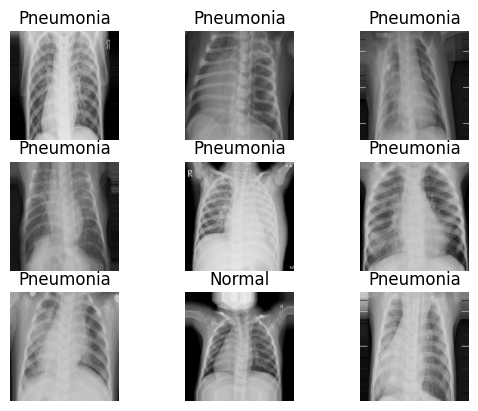

In [33]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Pneumonia" if labels[i] == 1 else "Normal")
plt.show()

In [34]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [35]:
# Display a few images from the training dataset to verify loading and augmentation
images, labels = next(valid_generator)

In [36]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

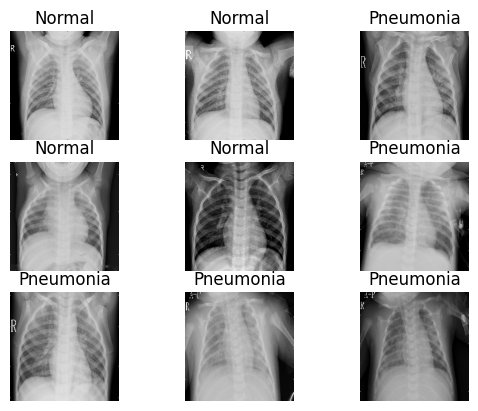

In [37]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Pneumonia" if labels[i] == 1 else "Normal")
plt.show()

In [38]:
# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [39]:
# Freeze the layers of ResNet50 so they are not trained
for layer in base_model.layers:
    layer.trainable = False

In [43]:
# Add custom layers on top of ResNet50
x = base_model.output

In [44]:
x = GlobalAveragePooling2D()(x)

In [45]:
x = Dense(1024, activation='relu')(x)

In [46]:
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

In [47]:
# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 64,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 64
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1168s 14s/step - accuracy: 0.7015 - loss: 0.6804 - val_accuracy: 0.5625 - val_loss: 0.6539
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7969 - loss: 0.4775 - val_accuracy: 0.5625 - val_loss: 0.6943
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1154s 14s/step - accuracy: 0.7665 - loss: 0.4600 - val_accuracy: 0.5625 - val_loss: 0.7776
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8750 - loss: 0.3054 - val_accuracy: 0.5625 - val_loss: 0.7809
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1153s 14s/step - accuracy: 0.7891 - loss: 0.4199 - val_accuracy: 0.6250 - val_loss: 0.6822
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.7500 - loss: 0.4834 - val_accuracy: 0.6250 - val_loss: 0.6942
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1155s 14s/step - accuracy: 0.8162 - loss: 0.3922 - val_accuracy: 0.6250 - val_loss: 0.6591
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7812 - loss: 0.4030 - val_accuracy

In [50]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(valid_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6875 - loss: 0.5933


In [51]:
print(f"Validation Loss: {val_loss}")

Validation Loss: 0.5933171510696411


In [52]:
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.6875


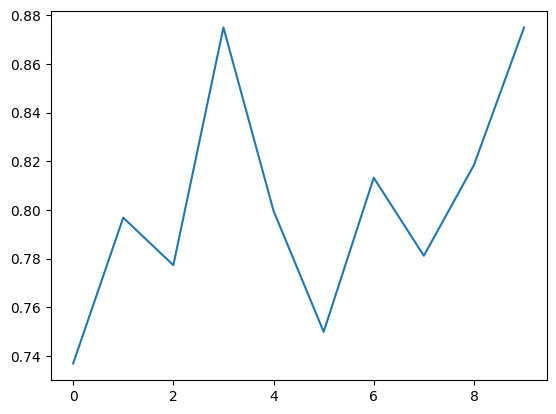

In [53]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')

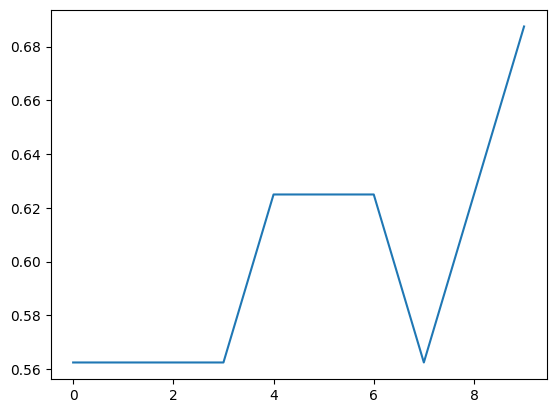

In [54]:
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

In [ ]:
plt.xlabel('Epoch')

In [ ]:
plt.ylabel('Accuracy')

In [ ]:
plt.ylim([0, 1])

In [ ]:
plt.legend(loc='lower right')

In [61]:
plt.show()

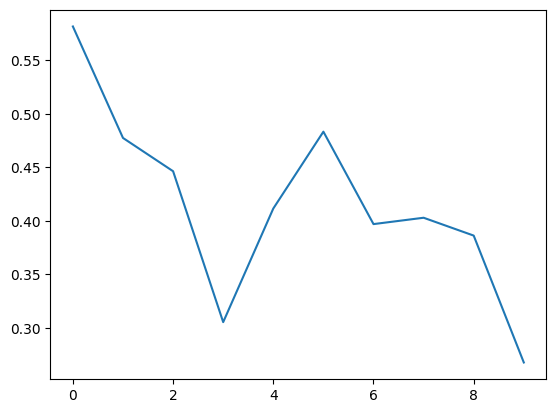

In [62]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')

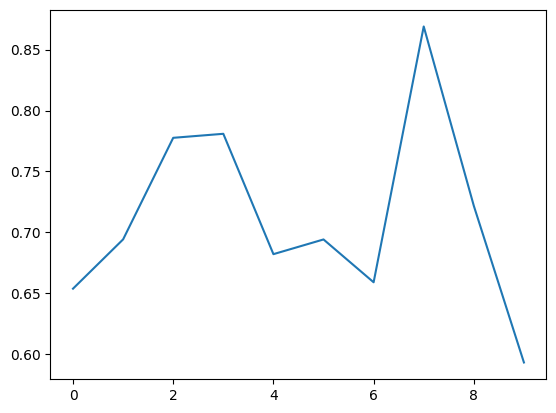

In [63]:
plt.plot(history.history['val_loss'], label = 'val_loss')

In [ ]:
plt.xlabel('Epoch')

In [ ]:
plt.ylabel('Loss')

In [ ]:
plt.ylim([0, 1])

In [ ]:
plt.legend(loc='upper right')

In [68]:
plt.show()

In [69]:
# Save the model
model.save('pneumonia_detection_model.keras')

In [70]:
# Load and preprocess a new image
img_path = "/content/drive/MyDrive/360_F_31886079_cc96CprospDZ0KeiKkKgr4ZqHE2iZFd2.jpg"  # Update with the path to the image

In [71]:
img = cv2.imread(img_path)

In [72]:
img = cv2.resize(img, (224, 224))

In [73]:
img = np.array(img) / 255.0

In [74]:
img = np.expand_dims(img, axis=0)

In [75]:
# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print(f"Prediction: Pneumonia (Confidence: {prediction[0][0] * 100:.2f}%)")
else:
    print(f"Prediction: Normal (Confidence: {100 - prediction[0][0] * 100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Normal (Confidence: 69.81%)
